In [1]:
### Linear Regression ###

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [5]:
wcat=pd.read_csv(r"C:\Users\ADMIN\OneDrive\Desktop\datasets\wc.at.csv")

In [6]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


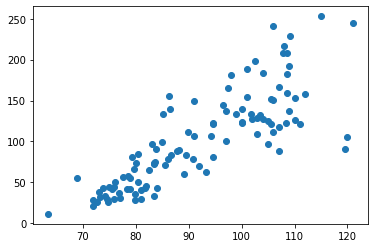

In [7]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'])

In [8]:
np.corrcoef(x=wcat['Waist'],y=wcat['AT'])

array([[1.        , 0.81855781],
       [0.81855781, 1.        ]])

In [9]:
import statsmodels.formula.api as smf

In [10]:
model=smf.ols('AT~Waist',data=wcat).fit()

In [11]:
model

In [12]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           1.62e-27
Time:                        11:13:32   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(model.conf_int(0.05))

                    0           1
Intercept -259.190053 -172.772923
Waist        2.993689    3.924030


In [15]:
pred=model.predict(pd.DataFrame(wcat['Waist']))

In [16]:
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [17]:
model1=smf.ols('AT~np.log(Waist)',data=wcat).fit()

In [18]:
model1

In [19]:
print(model.conf_int(0.01))

                    0           1
Intercept -273.143516 -158.819460
Waist        2.843470    4.074248


In [20]:
pred=model.predict(pd.DataFrame(wcat['Waist']))

In [21]:
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [22]:
model2=smf.ols('np.log(AT)~Waist',data=wcat).fit()

In [23]:
model2

In [24]:
print(model.conf_int(0.01))

                    0           1
Intercept -273.143516 -158.819460
Waist        2.843470    4.074248


In [25]:
pred=model.predict(pd.DataFrame(wcat['Waist']))

In [26]:
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [27]:
pred3=np.exp(pred)

In [28]:
pred3

0      3.070130e+18
1      1.809277e+15
2      1.195115e+29
3      2.027969e+32
4      2.172403e+18
           ...     
104    3.689799e+56
105    2.250560e+46
106    1.320325e+59
107    1.922553e+68
108    1.531710e+69
Length: 109, dtype: float64

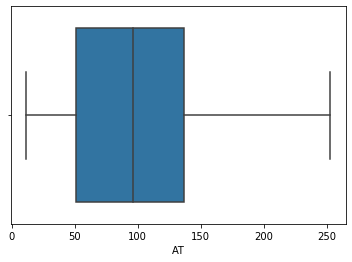

In [29]:
sns.boxplot(wcat['AT'])

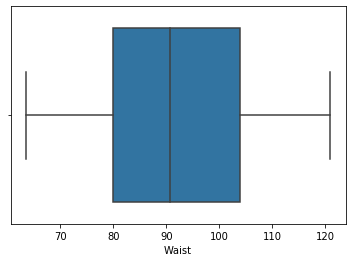

In [30]:
sns.boxplot(wcat['Waist'])

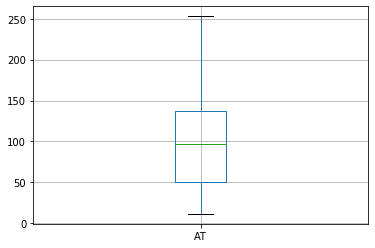

In [31]:
wcat.boxplot(column=['AT'])

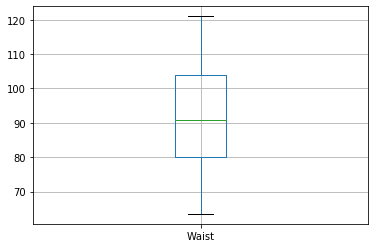

In [32]:
wcat.boxplot(column=['Waist'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129BAA32988>]],
      dtype=object)

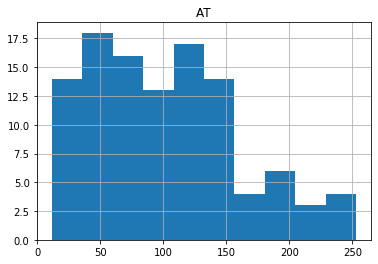

In [33]:
wcat.hist(column=['AT'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129BAA9D948>]],
      dtype=object)

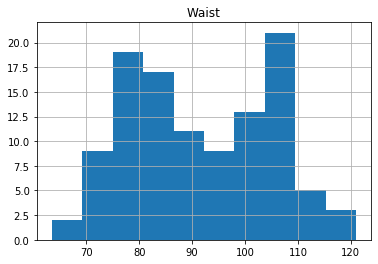

In [34]:
wcat.hist(column=['Waist'])

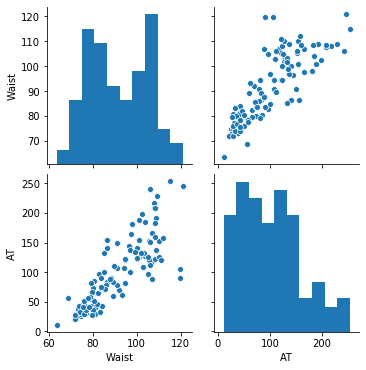

In [35]:
sns.pairplot(wcat)

In [2]:
#### Mulitple Linear Regression ###

In [90]:
cars=pd.read_csv(r"C:\Users\ADMIN\Downloads\Cars.csv")

In [91]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [92]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [93]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


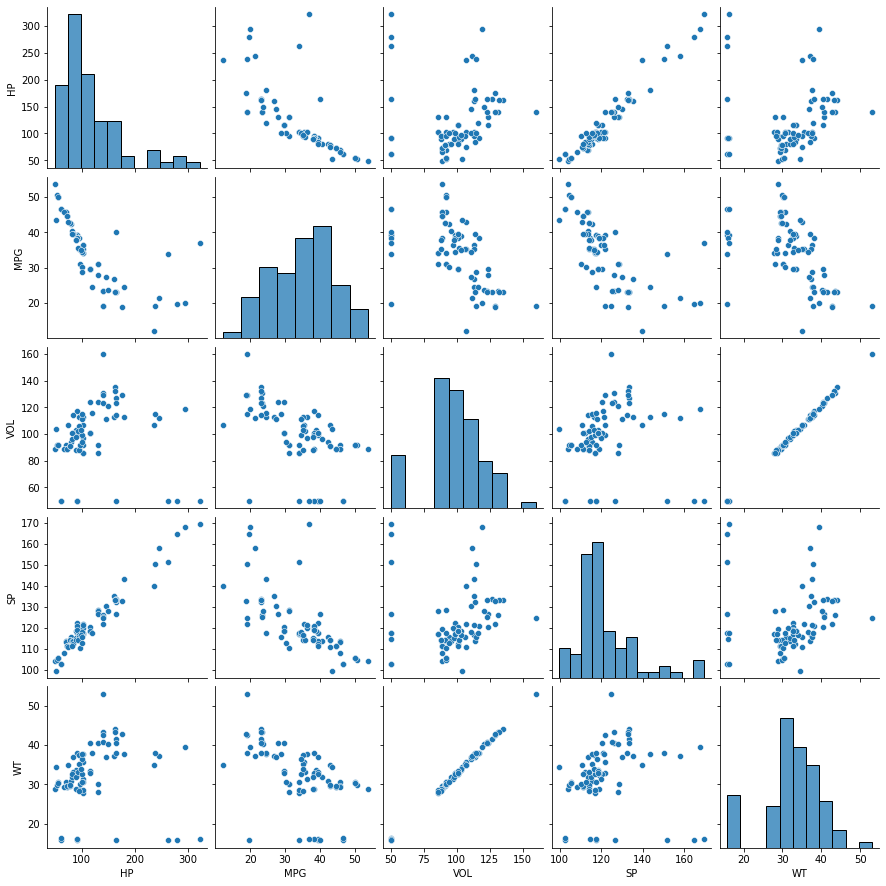

In [94]:
sns.pairplot(cars)

In [95]:
import statsmodels.formula.api as smf

In [96]:
model=smf.ols('MPG~HP+SP+VOL+WT',data=cars).fit()

In [97]:
model.params

Intercept    30.677336
HP           -0.205444
SP            0.395627
VOL          -0.336051
WT            0.400574
dtype: float64

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.54e-23
Time:                        12:32:30   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
SP             0.3956      0.158      2.500      0.015       0.080       0.711
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
print(model.conf_int(0.05))

                  0          1
Intercept  1.000824  60.353848
HP        -0.283550  -0.127338
SP         0.080428   0.710826
VOL       -1.468600   0.796499
WT        -2.972249   3.773397


In [100]:
pred=model.predict(cars)

In [101]:
pred

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64

In [102]:
model1=smf.ols('MPG~VOL',data=cars).fit()

In [103]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           3.82e-07
Time:                        12:32:31   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model2=smf.ols('MPG~WT',data=cars).fit()

In [105]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           4.38e-07
Time:                        12:32:31   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
model3=smf.ols('MPG~WT+VOL',data=cars).fit()

In [107]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           2.43e-06
Time:                        12:32:31   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
import statsmodels.api as sm

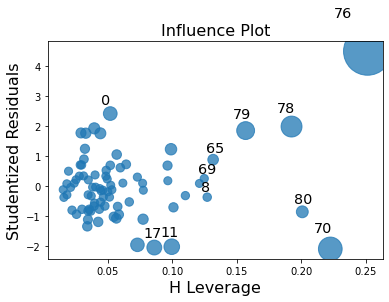

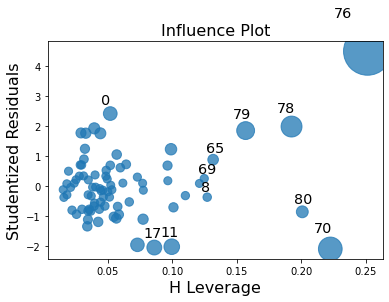

In [109]:
sm.graphics.influence_plot(model)

In [110]:
car=cars.drop(cars.index[[76]])

In [111]:
car

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [112]:
model4=smf.ols('MPG~HP+SP+VOL+WT',data=car).fit()

In [113]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           4.42e-27
Time:                        12:32:34   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
SP             0.4119      0.141      2.913      0.005       0.130       0.694
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
rsq_hp=smf.ols('HP~VOL+SP+WT',data=cars).fit().rsquared

In [146]:
rsq_hp

0.949815796308406

In [147]:
vif_hp=1/(1-rsq_hp)

In [148]:
vif_hp

19.926588974998563

In [149]:
rsq_sp=smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared

In [150]:
rsq_sp

0.9500190896665341

In [151]:
vif_sp=1/(1-rsq_sp)

In [152]:
vif_sp

20.00763878305008

In [153]:
rsq_wt=smf.ols('WT~HP+SP+VOL',data=cars).fit().rsquared

In [154]:
rsq_wt

0.9984363610296332

In [155]:
vif_wt=1/(1-rsq_wt)

In [156]:
vif_wt

639.5338175572624

In [157]:
rsq_vol=smf.ols('VOL~HP+SP+WT',data=cars).fit().rsquared

In [158]:
rsq_vol

0.9984345797174133

In [159]:
vif_vol=1/(1-rsq_vol)

In [160]:
vif_vol

638.8060836592878

In [162]:
m1=smf.ols('MPG~HP+SP+VOL',data=cars).fit()

In [163]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.56e-24
Time:                        12:37:15   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
m2=smf.ols('MPG~HP+SP+WT',data=cars).fit()

In [166]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.81e-24
Time:                        12:37:24   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
d1={'variables':pd.Series(['HP','SP','WT','VOL']),'VIF':pd.Series([vif_hp,vif_sp,vif_wt,vif_vol])}

In [168]:
vif_frame=pd.DataFrame(d1,columns=['variables','VIF'])

In [169]:
vif_frame

,variables,VIF
0,HP,19.926589
1,SP,20.007639
2,WT,639.533818
3,VOL,638.806084


In [170]:
y_pred=m1.predict(cars)

In [171]:
y_pred

0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64

In [172]:
from sklearn import metrics

In [173]:
print('Root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_pred,cars['MPG'])))

Root_mean_squared_error: 4.348684098518909


In [174]:
y_pred=m2.predict(cars)

In [176]:
print("Root_mean_squared_error:",np.sqrt(metrics.mean_squared_error(y_pred,cars['MPG'])))

Root_mean_squared_error: 4.357060933883888


In [3]:
### Multiple Linear Regression ###

In [177]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [178]:
cols=['HP','SP','VOL','WT']

In [179]:
x=cars[cols]

In [180]:
x

,HP,SP,VOL,WT
0,49,104.185353,89,28.762059
1,55,105.461264,92,30.466833
2,55,105.461264,92,30.193597
3,70,113.461264,92,30.632114
4,53,104.461264,92,29.889149
...,...,...,...,...
76,322,169.598513,50,16.132947
77,238,150.576579,115,37.923113
78,263,151.598513,50,15.769625
79,295,167.944460,119,39.423099


In [181]:
y=cars.MPG

In [182]:
y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

In [183]:
from sklearn.model_selection import train_test_split

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=1)

In [198]:
from sklearn.linear_model import LinearRegression

In [199]:
model=LinearRegression()

In [200]:
model.fit(x_train,y_train)

LinearRegression()

In [201]:
y_pred=model.predict(x_test)

In [202]:
y_pred

array([27.29528094, 38.84151546, 37.94561137, 18.30614895, 34.8509459 ,
       36.11053121, 26.5307103 , 16.70146043, 35.09946366, 25.25207787,
       37.92268018, 26.18334208, 39.3655718 , 35.10198658, 35.94020401,
       41.81996807, 38.5048156 , 43.06461298, 37.86982828, 35.28834715,
       36.59349488, 41.96337272, 26.15608873, 36.53732878, 37.99809445])

In [203]:
from sklearn import metrics

In [204]:
print("Root_mean_Squared_error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root_mean_Squared_error: 5.1647308164330505
